# NCAA Basketball Project

## Overview
Every year, the NBA draft welcomes newcomers into the league, most coming to the NCAA collegiate level.  Every year, executives, coaches , and scouts are tasked with drafting a pool of hundreds of players that have entered the draft.  Because of countless (tangible and intangible) attributes that a player is judged on , this is a lengthy process  for NBA teams.

The product I want to begin to create is a model that helps NBA executives draft quality NBA talent from the NCAA to make the scouting process more efficient.  


In [ ]:
#import raw data
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Final_Project_Chegg_Skills/NCAA_2009-2022 - CollegeBasketballPlayers2009-2021.csv')
data= df

data

<ipython-input-1-b31fb7325103>:4: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Final_Project_Chegg_Skills/NCAA_2009-2022 - CollegeBasketballPlayers2009-2021.csv')


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dreb,treb,ast,stl,blk,pts,Pos,0,0.1,0.2
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026,0,0
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375,0,0
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680,0,0
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427,0,0
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000,0,0
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000,0,0
61060,Jaden Jones,Rutgers,B10,4,1.0,89.6,28.8,25.0,25.00,10.3,...,0.0000,0.2500,0.7500,0.0000,0.0000,0.7500,Pure PG,10.43920,0,0
61061,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.00000,0,0


The dataset includes player statistics like usage percentage that correlates to how much a player is used in certain plays during the game. Other features include games played, average minutes played, and field goal percentage.  This dataset gives a picture of the players’ NCAA careers and how they could be rank when it comes to being drafted in the NBA.

In [ ]:
#look where nulls might be
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61063 entries, 0 to 61062
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      61063 non-null  object 
 1   team                             61063 non-null  object 
 2   conf                             61063 non-null  object 
 3   GP                               61063 non-null  int64  
 4   Min_per                          61063 non-null  float64
 5   Ortg                             61063 non-null  float64
 6   usg                              61063 non-null  float64
 7   eFG                              61063 non-null  float64
 8   TS_per                           61063 non-null  float64
 9   ORB_per                          61063 non-null  float64
 10  DRB_per                          61063 non-null  float64
 11  AST_per                          61063 non-null  float64
 12  TO_per            

##Cleaning Data

We first look at which columns have nulls and decide how we want to handle them.  Because all of these columns are not numeric, we fill in the nulls with 'N/A'.

In [ ]:
#specify null columns
data.columns[data.isnull().any()]

Index(['yr', 'ht', 'num', 'Pos'], dtype='object')

In [ ]:
# fill nulls in with "N/A"
data["yr"].fillna("N/A", inplace = True)
data["ht"].fillna("N/A", inplace = True)
data["Pos"].fillna("N/A", inplace = True)
data["num"].fillna("N/A", inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61063 entries, 0 to 61062
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      61063 non-null  object 
 1   team                             61063 non-null  object 
 2   conf                             61063 non-null  object 
 3   GP                               61063 non-null  int64  
 4   Min_per                          61063 non-null  float64
 5   Ortg                             61063 non-null  float64
 6   usg                              61063 non-null  float64
 7   eFG                              61063 non-null  float64
 8   TS_per                           61063 non-null  float64
 9   ORB_per                          61063 non-null  float64
 10  DRB_per                          61063 non-null  float64
 11  AST_per                          61063 non-null  float64
 12  TO_per            

<ipython-input-4-f624cd429fea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["yr"].fillna("N/A", inplace = True)
<ipython-input-4-f624cd429fea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [ ]:
#check for any more nulls not handled
data.columns[data.isnull().any()]

Index([], dtype='object')

Looking at the dataset, the last 3 columns were not specified in the description of what they represent, so we drop them.

In [ ]:
#drop columns that we do not know what they represent
data = data.drop(columns=['0','0.1','0.2'])

Now , taking a secondary look at the dataset, we seek out players that are known to confirm at quick glance that our dataset is as accurate as can be.

**Payton Pritchard** was a 4 year player that played at Oregon for his entire NCAA career, receiving a lot of playing time and is known as a stand out college player.

**Zion Williamson** was a "one and done" player who played at Duke for one year.  He the top prospect and only needed to player one year of college before eventually getting drafted the next year.

**Johnny Juzang** played multiple years in college (all not covered in the scope of the dataset) who transferred schools after his first year.

All of the information above is confirmed and highlighted in this next chunk of code.

In [ ]:
#check players we know from NCAA
data[data['player_name']=='Payton Pritchard']

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Pos
41251,Payton Pritchard,Oregon,P12,38,71.1,111.7,15.8,50.2,53.19,2.6,...,0.972638,2.586090,0.5897,2.7692,3.3590,3.5897,1.1538,0.0769,7.4359,Scoring PG
44565,Payton Pritchard,Oregon,P12,36,86.6,116.8,21.0,55.4,58.32,1.7,...,3.132170,0.847469,0.5000,3.3333,3.8333,4.7500,1.4167,0.0000,14.5278,Scoring PG
48157,Payton Pritchard,Oregon,P12,38,88.3,112.7,21.4,49.9,54.34,3.0,...,2.852180,2.822550,0.8684,3.0000,3.8684,4.6053,1.7895,0.0789,12.9474,Scoring PG
52081,Payton Pritchard,Oregon,P12,31,88.8,120.6,28.4,56.3,60.08,2.3,...,8.700300,1.340320,0.6774,3.6452,4.3226,5.5484,1.5161,0.0323,20.4839,Scoring PG


In [ ]:
zion_pid=data.pid[data['player_name']=='Zion Williamson']
data[data['player_name']=='Zion Williamson']


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Pos
49912,Zion Williamson,Duke,ACC,33,64.9,129.2,28.2,70.8,70.19,12.8,...,12.8016,5.87104,3.5152,5.3636,8.8788,2.0606,2.1212,1.7879,22.6061,Wing F


In [ ]:
data[data['player_name']=='Johnny Juzang']

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Pos
55860,Johnny Juzang,Kentucky,SEC,28,27.7,96.9,13.7,46.8,49.58,4.8,...,-0.061802,0.452215,0.4643,1.4643,1.9286,0.2857,0.1786,0.0714,2.9286,Stretch 4
59311,Johnny Juzang,UCLA,P12,27,65.8,109.3,24.8,51.7,54.84,3.3,...,5.537290,0.874637,0.8519,3.2593,4.1111,1.5926,0.7778,0.3333,16.0000,Wing G


We decide to drop all non-numerical columns for ease of computations and training our predictive model .  We could choose to use one hot encoding, but there are too many unique values and would take a lot of time to run.

In [ ]:
#drop non-numerical columns
data = data.drop(columns=['conf','yr', 'num','Pos','type'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61063 entries, 0 to 61062
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      61063 non-null  object 
 1   team                             61063 non-null  object 
 2   GP                               61063 non-null  int64  
 3   Min_per                          61063 non-null  float64
 4   Ortg                             61063 non-null  float64
 5   usg                              61063 non-null  float64
 6   eFG                              61063 non-null  float64
 7   TS_per                           61063 non-null  float64
 8   ORB_per                          61063 non-null  float64
 9   DRB_per                          61063 non-null  float64
 10  AST_per                          61063 non-null  float64
 11  TO_per                           61063 non-null  float64
 12  FTM               

In [ ]:
#fix 00 so 0 can be used in mathematical computations
data= data.replace('00','0')

Taking a glance at the "ht" (height) column , we can see that the values show date time, even some representing the year of college the players are in.  We decide to fix these values to represent height in inches because height is a huge factor in the draft process.  

Handling the date-time entries, it is to be assumed that "2-Jun" represents a 6'2 player (as June is the 6 month of the year).  This is confirmed through research on the internet.

All other values would need to be hard coded manually and this was able to be completed because there were only a hand full of entries that needed to be fixed.

The heights that were hardcoded we retrieved from reliable sources, either the school rosters or ESPN sites.

In [ ]:
#look at unique vales in the height column to handle individually
data.ht.unique()

array(['2-Jun', '4-Jun', '8-Jun', '1-Jun', '5-Jun', 'Jun-00', '6-Jun',
       '9-Jun', '3-Jun', '11-Jun', '7-Jun', '10-May', '10-Jun', '11-May',
       '9-May', 'Jul-00', '7-May', '5-Jul', '8-May', '6-May', '2-Jul',
       '1-Jul', '-', '3-May', '3-Jul', 'Apr-00', '5-May', '4-Jul', '0',
       'So', 'Jr', 'Fr', "6'4", 'N/A', '4-May', '1-May', '6-Jul', '5-Apr',
       '2-May'], dtype=object)

In [ ]:
data[data['ht']=='So']

,player_name,team,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
6389,Andy Shannon,Pepperdine,6,2.2,46.2,2.3,0.0,0.0,0.0,27.5,...,4.3333,-8.99787,4.48132,0.0,1.0,1.0,0.1667,0.0,0.3333,0.0


In [ ]:
data.loc[6389,'ht']=84

In [ ]:
data[data['ht']=='5-Apr']

,player_name,team,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
26516,Tyler Scott,Kent St.,4,0.2,78.0,42.1,0.0,0.0,77.6,0.0,...,0.75,13.1199,-8.65443,0.5,0.0,0.5,0.25,0.0,0.0,0.0


In [ ]:
data[data['ht']=='Apr-00']

,player_name,team,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
2654,Jamaal Day,South Carolina St.,6,4.2,70.9,12.9,11.1,20.10,10.3,9.3,...,7.6667,-6.29070,-3.374110,0.6667,0.6667,1.3333,0.6667,0.0000,0.0000,0.6667
4929,Austin Falke,Stephen F. Austin,17,9.1,114.4,11.3,45.2,45.56,1.2,8.8,...,6.2353,-3.14505,-0.443312,0.0588,0.4118,0.4706,0.5294,0.1176,0.0000,1.1765
6247,Steven Gambles,Indiana,8,1.0,34.5,17.6,0.0,0.00,26.0,8.9,...,1.6250,-10.84910,-4.849100,0.3750,0.1250,0.5000,0.0000,0.0000,0.1250,0.0000
6550,Sean Hobbs,UNC Asheville,2,0.5,0.0,0.0,0.0,0.00,0.0,0.0,...,3.0000,-4.55066,3.602850,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000
7945,Bakari Taylor,Hampton,12,3.6,101.6,10.0,57.1,57.14,7.6,4.8,...,3.8333,-6.37121,-1.656500,0.2500,0.1667,0.4167,0.0833,0.0000,0.0833,0.6667
8756,Jeff Osborne,Cal St. Bakersfield,2,0.4,0.0,14.2,0.0,0.00,0.0,23.1,...,2.5000,-12.18690,-7.549390,0.0000,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000
11231,Bakari Taylor,Hampton,5,1.2,134.1,15.3,66.7,66.67,6.7,20.1,...,3.2000,3.79921,3.162380,0.2000,0.6000,0.8000,0.0000,0.2000,0.0000,1.6000
11564,Michael Starks,Alcorn St.,21,34.9,96.5,11.2,46.4,48.00,6.4,14.2,...,18.0476,-4.16492,0.086524,1.1905,2.5238,3.7143,0.3333,0.4286,1.2381,3.7619
12562,Christian Hurrington,Delaware St.,3,0.9,0.0,11.3,0.0,0.00,0.0,14.1,...,3.3333,-15.04780,2.133000,0.0000,0.3333,0.3333,0.0000,0.0000,0.6667,0.0000
14706,Chris Carter,Providence,16,2.8,122.2,9.1,66.7,66.67,6.3,3.0,...,2.2500,-1.94987,-1.769910,0.1250,0.0625,0.1875,0.0000,0.0625,0.0000,0.5000


In [ ]:
data.loc[29548,'ht']=76
data.loc[25580,'ht']=78
data.loc[25538,'ht']=80
data.loc[25427,'ht']=72
data.loc[25349,'ht']=76
data.loc[22546,'ht']=78
data.loc[22310,'ht']=72
data.loc[22220,'ht']=76
data.loc[16854,'ht']=74
data.loc[14797,'ht']=77
data.loc[11231,'ht']=77
data.loc[7945,'ht']=77
data.loc[14706,'ht']=76
data.loc[12562,'ht']=75
data.loc[11564,'ht']=80
data.loc[8756,'ht']=70
data.loc[6550,'ht']=86
data.loc[6247,'ht']=76
data.loc[4929,'ht']=73
data.loc[2654,'ht']=74



In [ ]:
data[data['ht']=='Jr']

,player_name,team,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
6994,Denis Agre,Pepperdine,14,5.8,125.4,7.8,42.9,44.94,15.5,7.0,...,4.8571,-2.53142,-0.183145,0.7143,0.2857,1.0,0.0,0.1429,0.2143,0.5714
8733,Daniel Brady,UMKC,6,1.3,200.0,2.6,100.0,100.00,0.0,27.2,...,2.5000,-6.10508,3.336870,0.0000,0.5000,0.5,0.0,0.1667,0.0000,0.3333


In [ ]:
data.loc[6994,'ht']=80
data.loc[8733,'ht']=79

In [ ]:
data[data['ht']=='Fr']

,player_name,team,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
8963,Max Rockmann,UMKC,5,4.5,80.5,13.3,50.0,53.41,2.3,8.2,...,10.0,-4.29377,-4.84245,0.2,0.6,0.8,0.4,0.0,0.0,1.8


In [ ]:
data.loc[8963,'ht']=78

In [ ]:
data[data['ht']=='0']

,player_name,team,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
4489,Brady Richie,IPFW,1,0.1,0.0,44.1,0.0,0.0,0.0,0.0,...,1.0,-36.80730,-24.09920,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4567,Mark Warrington,Saint Peter's,1,0.1,204.6,12.3,0.0,0.0,117.0,0.0,...,1.0,28.12120,-12.12780,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4597,Scott Brittain,Boston University,1,0.1,0.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4986,Blake Thompson,Georgia Southern,1,0.1,0.0,26.6,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5260,Stephen Duckett,Xavier,1,0.1,63.8,25.7,0.0,0.0,57.3,0.0,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61049,Jake Nichols,George Mason,2,0.2,0.0,0.0,0.0,0.0,0.0,59.2,...,1.0,-7.85075,2.87882,0.0,0.5,0.5,0.0,0.0,0.0,0.0
61058,Sandy Ryan,Tulane,1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-3.52482,-1.12681,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61059,Ty Larson,Texas Tech,1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.87604,-2.38075,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61061,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#use replace to fix columns that were imported as dates
data['ht'].replace('2-Jun',74,inplace=True)
data['ht'].replace('4-Jun',76,inplace=True)
data['ht'].replace('8-Jun',80,inplace=True)
data['ht'].replace('1-Jun',73,inplace=True)
data['ht'].replace('5-Jun',77,inplace=True)
data['ht'].replace('Jun-00',72,inplace=True)
data['ht'].replace('9-Jun',81,inplace=True)
data['ht'].replace('3-Jun',75,inplace=True)
data['ht'].replace('11-Jun',83,inplace=True)
data['ht'].replace('7-Jun',79,inplace=True)
data['ht'].replace('10-May',70,inplace=True)
data['ht'].replace('10-Jun',82,inplace=True)
data['ht'].replace('11-May',64,inplace=True)
data['ht'].replace('9-May',69,inplace=True)
data['ht'].replace('Jul-00',84,inplace=True)
data['ht'].replace('7-May',67,inplace=True)
data['ht'].replace('5-Jul',89,inplace=True)
data['ht'].replace('8-May',68,inplace=True)
data['ht'].replace('6-May',66,inplace=True)
data['ht'].replace('2-Jul',86,inplace=True)
data['ht'].replace('1-Jul',85,inplace=True)
data['ht'].replace('3-May',63,inplace=True)
data['ht'].replace('3-Jul',87,inplace=True)
data['ht'].replace('-',None,inplace=True)
data['ht'].replace('Apr-00',None,inplace=True)
data['ht'].replace('5-May',65,inplace=True)
data['ht'].replace('4-Jul',88,inplace=True)
data['ht'].replace('0',None,inplace=True)
data['ht'].replace('N/A',None,inplace=True)
data['ht'].replace('4-May',64,inplace=True)
data['ht'].replace('1-May',61,inplace=True)
data['ht'].replace('2-May',62,inplace=True)
data['ht'].replace('6-Jun',78,inplace=True)
data['ht'].replace("6'4",76,inplace=True)
data['ht'].replace('5-Apr',None,inplace=True)
data['ht'].replace('6-Jul',90,inplace=True)






<ipython-input-24-030f1666c0b8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ht'].replace('2-Jun',74,inplace=True)
<ipython-input-24-030f1666c0b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
#height has values in inches or nulls
data.ht.unique()

array([74., 76., 80., 73., 77., 72., 78., 81., 75., 83., 79., 70., 82.,
       64., 69., 84., 67., 89., 68., 66., 86., 85., nan, 63., 87., 65.,
       88., 61., 90., 62.])

Here we end our data cleaning process with the first iteration of cleaned data.  All columns are numeric (except for name and team) and each have 61,063 values.  It is important to note that these does not represent 61,063 different players, rather that players and their specific season.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61063 entries, 0 to 61062
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      61063 non-null  object 
 1   team                             61063 non-null  object 
 2   GP                               61063 non-null  int64  
 3   Min_per                          61063 non-null  float64
 4   Ortg                             61063 non-null  float64
 5   usg                              61063 non-null  float64
 6   eFG                              61063 non-null  float64
 7   TS_per                           61063 non-null  float64
 8   ORB_per                          61063 non-null  float64
 9   DRB_per                          61063 non-null  float64
 10  AST_per                          61063 non-null  float64
 11  TO_per                           61063 non-null  float64
 12  FTM               

##Explore

Here we will explore our data and alter our features to use for training our model.  We first look at distributions of a few important and well known features from the dataset.

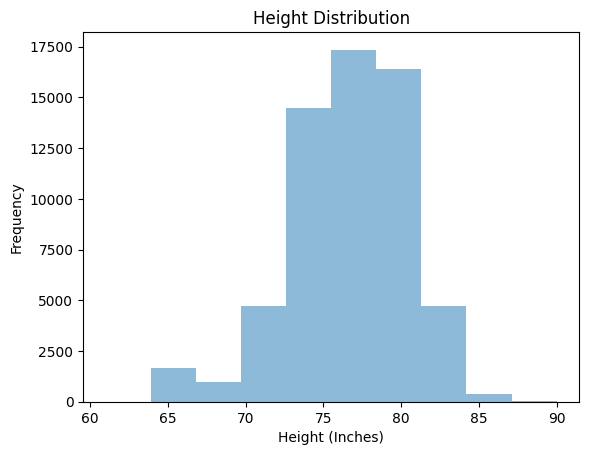

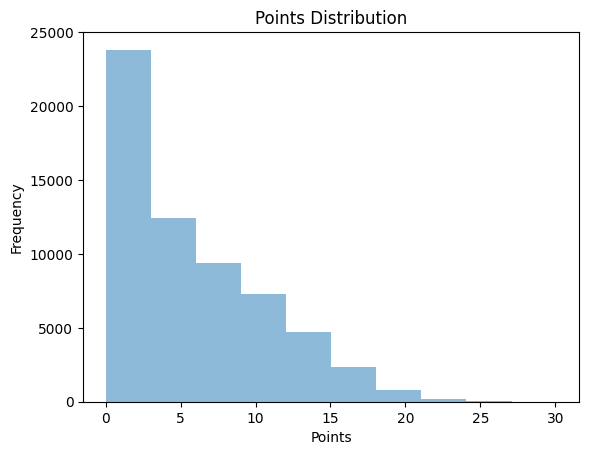

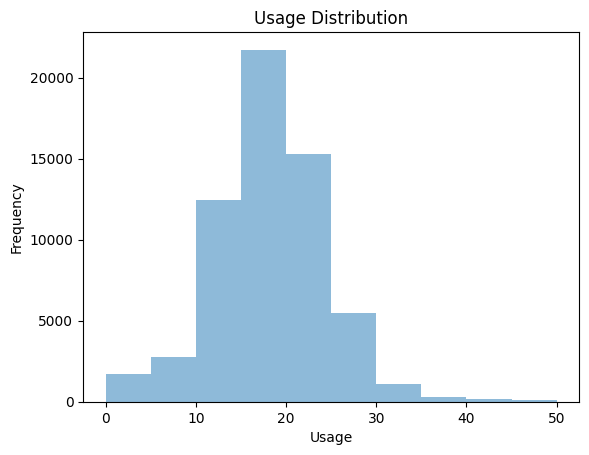

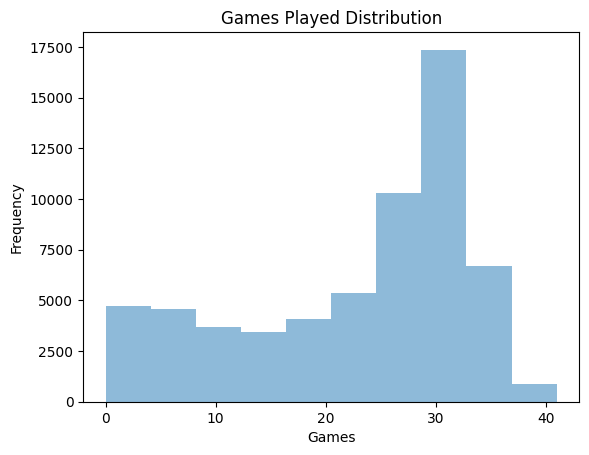

In [ ]:
#explore distributions of some important features
import matplotlib.pyplot as plt
plt.hist(data['ht'], alpha = .5)
plt.title('Height Distribution')
plt.xlabel('Height (Inches)')
plt.ylabel('Frequency')
plt.show()
plt.hist(data['pts'], alpha = .5)
plt.title('Points Distribution')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()
plt.hist(data['usg'], alpha = .5)
plt.title('Usage Distribution')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.show()
plt.hist(data['GP'], alpha = .5)
plt.title('Games Played Distribution')
plt.xlabel('Games')
plt.ylabel('Frequency')
plt.show()

We fully delete entries with null heights since they are small percentage of the whole dataset and because we want to use height as a feature.

In [ ]:
#get rid of entries with null value (it is a small percentage of total entries)
data.dropna(subset=['ht'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60689 entries, 0 to 61060
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      60689 non-null  object 
 1   team                             60689 non-null  object 
 2   GP                               60689 non-null  int64  
 3   Min_per                          60689 non-null  float64
 4   Ortg                             60689 non-null  float64
 5   usg                              60689 non-null  float64
 6   eFG                              60689 non-null  float64
 7   TS_per                           60689 non-null  float64
 8   ORB_per                          60689 non-null  float64
 9   DRB_per                          60689 non-null  float64
 10  AST_per                          60689 non-null  float64
 11  TO_per                           60689 non-null  float64
 12  FTM                    

Next we are going to sort our data through the PID given to the player.  The PID is a unique combination of numbers to distguish them apart, perfect for our cleaning process.

In [ ]:
#sort values by PID so entries of same player are near each other
data= data.sort_values(by=['pid'])
data= data.reset_index()
data

,index,player_name,team,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
0,0,DeAndrae Ross,South Alabama,26,29.5,97.3,16.6,42.5,44.43,1.6,...,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846
1,9287,DeAndrae Ross,Troy,7,11.5,67.1,16.9,34.5,36.11,3.1,...,18.8571,-7.319820,-3.886670,0.5714,1.1429,1.7143,1.4286,0.1429,0.0000,3.2857
2,9288,Pooh Williams,Utah St.,33,64.5,105.6,18.7,48.1,52.40,0.8,...,26.0000,0.860731,0.685989,0.1515,1.4848,1.6364,2.0909,0.2121,0.0909,8.6667
3,4589,Pooh Williams,Utah St.,32,64.0,108.3,18.1,53.0,53.33,2.3,...,27.3125,0.785960,0.276271,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812
4,1,Pooh Williams,Utah St.,34,60.9,108.3,14.9,52.4,54.48,3.8,...,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60684,61054,Abiram Frye,New Orleans,1,0.2,0.0,0.0,0.0,0.00,0.0,...,2.0000,-6.791950,1.201100,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
60685,61055,Kamron Battle,Northern Illinois,2,0.5,0.0,0.0,0.0,0.00,0.0,...,2.0000,-14.203200,-6.921100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
60686,61056,Trey Patterson,Villanova,2,0.3,60.5,19.3,0.0,0.00,0.0,...,1.5000,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000
60687,61057,Stavros Polatoglou,Northwestern St.,4,1.3,28.3,7.1,0.0,0.00,7.0,...,3.7500,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000


We now drop the last non-numeric columns (name and team). The name feature is not needed since we have the PID. Team is going to be used, again, since there too many unqiue values for one-hot encoding (at least for our given resources)

In [ ]:
#dropping index because it is not needed
#dropping player name and team because they could not be aggregated since not numeric
# if had more resoruces and computing power, I would use hot one encoding for teams and conferences to distinguish which schools and conferences produce more draft picks and account for style of play, diffculty, etc.
data= data.drop(columns=['index', 'player_name', 'team'])
data
col = data.pop('pid')
data.insert(0, col.name, col)
data

,pid,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
0,2,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,...,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846
1,2,7,11.5,67.1,16.9,34.5,36.11,3.1,6.8,13.8,...,18.8571,-7.319820,-3.886670,0.5714,1.1429,1.7143,1.4286,0.1429,0.0000,3.2857
2,3,33,64.5,105.6,18.7,48.1,52.40,0.8,6.4,16.2,...,26.0000,0.860731,0.685989,0.1515,1.4848,1.6364,2.0909,0.2121,0.0909,8.6667
3,3,32,64.0,108.3,18.1,53.0,53.33,2.3,5.9,14.6,...,27.3125,0.785960,0.276271,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812
4,3,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,...,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60684,74227,1,0.2,0.0,0.0,0.0,0.00,0.0,55.6,0.0,...,2.0000,-6.791950,1.201100,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
60685,74228,2,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,2.0000,-14.203200,-6.921100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
60686,74229,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,51.1,...,1.5000,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000
60687,74230,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,...,3.7500,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000


We are not going to seperate our data between drafted and undrafted players to compare the two groups.  

We see there are 61 unique values in the draft column.  These represent the 60 picks in the draft, and those not drafted have been assigned 0.  

For the purposes of this project, we are focusing on whether or not a player should be drafted, NOT what place in the draft they were.  There are many other factors that and reasons that play into where what place and number a player is drafted.  This would require more data and features as well as a wider scope of players to get a full scope of where a player should be drafted based off of pure data . (Although this would be a great project with greater resources).

In [ ]:
# 60 picks in draft, if not drafted listed as 0, resulting in 61 unique values
len(data.pick.unique())

61

In [ ]:
drafted = data[data['pick']!=0]
drafted

,pid,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
56,57,33,91.5,109.4,28.1,49.8,55.28,3.2,10.1,24.9,...,37.0000,5.932980,1.579480,1.1515,3.4545,4.6061,3.9697,1.8182,0.5455,21.0000
57,57,32,92.4,123.2,28.7,57.7,62.93,1.6,8.6,31.3,...,37.4062,8.915820,0.912311,0.5000,2.7188,3.2188,4.6875,1.6562,0.6250,22.5000
58,57,31,86.2,104.3,30.8,43.1,50.76,2.7,11.9,32.6,...,35.0323,3.448400,1.166500,0.9032,3.8387,4.7419,4.3226,1.4194,0.4516,19.5161
86,91,34,62.5,116.3,19.8,60.7,60.85,11.9,12.9,6.5,...,25.2647,3.802010,1.053410,2.6765,2.8529,5.5294,0.7647,0.5882,0.8529,10.5588
87,91,37,59.7,107.5,24.3,59.3,57.77,10.9,15.0,7.7,...,24.4595,2.766200,0.898895,2.2162,3.1622,5.3784,0.8108,0.3514,0.7027,11.5676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60258,73518,29,47.9,101.9,27.5,51.9,52.09,18.3,23.8,15.4,...,19.1724,3.884340,2.553560,3.3793,4.2069,7.5862,1.4483,0.7931,0.8966,9.4828
60262,73524,25,51.1,108.0,21.3,54.0,58.69,11.3,23.4,7.5,...,20.6400,1.980730,5.462610,2.1200,4.4800,6.6000,0.7200,0.7600,2.6000,8.4400
60353,73630,26,48.9,91.7,25.8,49.7,53.48,6.8,25.7,3.8,...,20.5769,-0.541827,2.172990,1.1923,4.9615,6.1538,0.3846,0.5769,1.0000,9.3462
60399,73686,27,62.5,95.2,27.3,47.4,51.71,4.8,11.2,21.2,...,25.0000,0.439697,2.394800,1.0370,2.4444,3.4815,2.4815,1.1111,0.4074,11.2593


In [ ]:
undrafted = data[data['pick']==0]
undrafted

,pid,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
0,2,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,...,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846
1,2,7,11.5,67.1,16.9,34.5,36.11,3.1,6.8,13.8,...,18.8571,-7.319820,-3.886670,0.5714,1.1429,1.7143,1.4286,0.1429,0.0000,3.2857
2,3,33,64.5,105.6,18.7,48.1,52.40,0.8,6.4,16.2,...,26.0000,0.860731,0.685989,0.1515,1.4848,1.6364,2.0909,0.2121,0.0909,8.6667
3,3,32,64.0,108.3,18.1,53.0,53.33,2.3,5.9,14.6,...,27.3125,0.785960,0.276271,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812
4,3,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,...,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60684,74227,1,0.2,0.0,0.0,0.0,0.00,0.0,55.6,0.0,...,2.0000,-6.791950,1.201100,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
60685,74228,2,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,2.0000,-14.203200,-6.921100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
60686,74229,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,51.1,...,1.5000,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000
60687,74230,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,...,3.7500,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000


We not look at the distrubution of the features we looked at previously, now sepereated between drafted and undrafted players.

For the points feature, we can see that the drafted players tend to average more points in a season, none averaging more than 30.

For the usage and games played features we can see they are somewhat simlilar.  From a basketball standpoint, college basketball is geared to more team-heavy gameplay compared to the NBA, resulting in the full scope of players having similar usage and games played.  

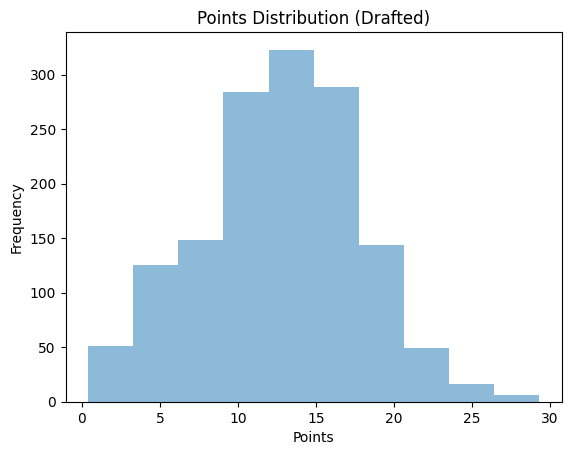

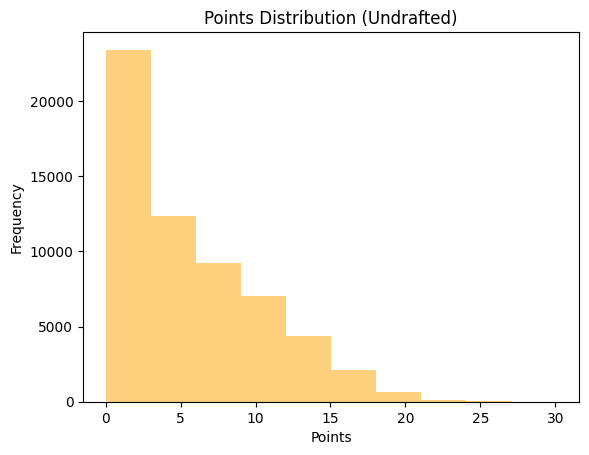

In [ ]:
plt.hist(drafted['pts'], alpha = .5)
plt.title('Points Distribution (Drafted)')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()
plt.hist(undrafted['pts'], color='orange', alpha = .5)
plt.title('Points Distribution (Undrafted)')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

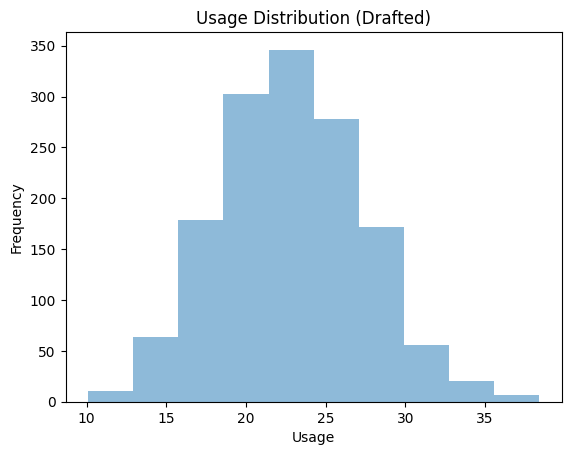

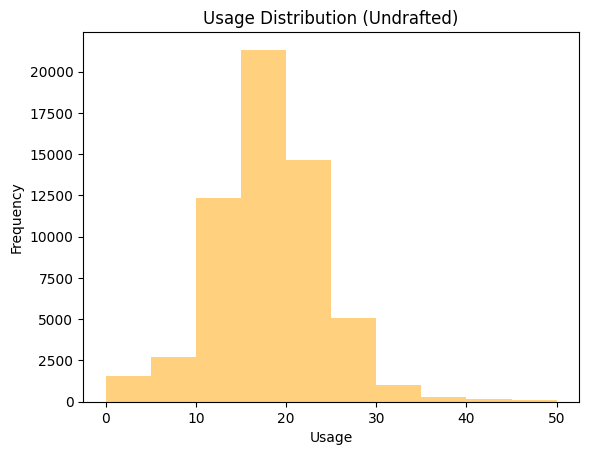

In [ ]:
plt.hist(drafted['usg'], alpha = .5)
plt.title('Usage Distribution (Drafted)')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.show()
plt.hist(undrafted['usg'], color= 'orange' ,alpha = .5)
plt.title('Usage Distribution (Undrafted)')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.show()

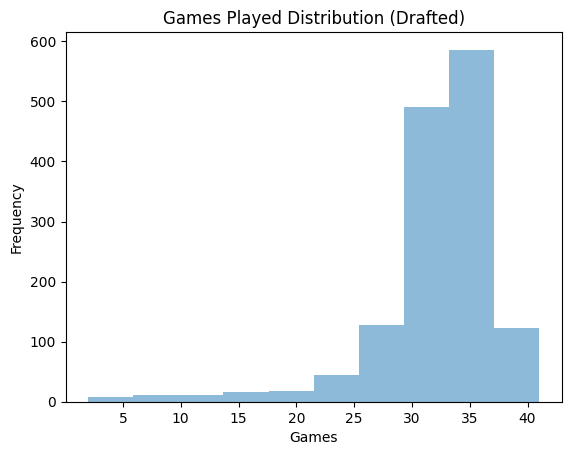

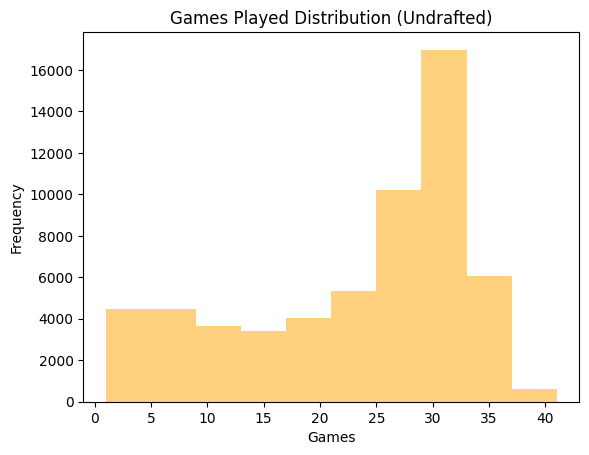

In [ ]:
plt.hist(drafted['GP'], alpha = .5)
plt.title('Games Played Distribution (Drafted)')
plt.xlabel('Games')
plt.ylabel('Frequency')
plt.show()
plt.hist(undrafted['GP'],color='orange', alpha = .5)
plt.title('Games Played Distribution (Undrafted)')
plt.xlabel('Games')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# add code to group by pid,
#need to handle name and team columns as they can not be aggregated
#think about using mean for all columns, except for GP
#this is used to pass through the model, hot one encoding for draft picks and non picks
# model to predict whether or not a player will be drafted
# possibly create a second model to distguish/predict lottery versus non lottery picks

We are going to manipulate our data once more to represent a wider view of the data.  First we are going to take the GP (games played) feature and use the sum of all the games played by a particular player (represented by PID).

In [ ]:
total_games=data.groupby(['pid']).GP.sum()
total_games

,GP
pid,
2,33
3,99
5,27
8,30
9,33
...,...
74227,1
74228,2
74229,2


For all of the other features, we will use the overall average and add the new GP feature to our dataset.

In [ ]:
avg_data=data.groupby(['pid']).mean()
avg_data=data = avg_data.drop(columns=['GP'])

In [ ]:

filtered_data = avg_data.join([total_games])
filtered_data

,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,GP
pid,,,,,,,,,,,,,,,,,,,,,
2,20.500000,82.2,16.750000,38.500000,40.270000,2.35,5.7,14.8,24.550000,6.500000,...,-5.050905,-2.913910,0.381850,0.879150,1.261000,1.310450,0.24455,0.019250,3.585150,33
3,63.133333,107.4,17.233333,51.166667,53.403333,2.30,6.2,14.8,16.866667,38.666667,...,0.531476,0.238109,0.432267,1.374833,1.807133,2.033967,0.40590,0.181667,7.796367,99
5,72.000000,96.2,21.800000,45.700000,47.980000,2.10,8.0,14.7,15.900000,45.000000,...,1.548230,-0.883163,0.629600,2.333300,2.963000,1.963000,0.48150,0.000000,12.185200,27
8,44.500000,97.7,16.000000,53.600000,53.690000,4.10,9.4,13.7,23.800000,14.000000,...,-0.342775,-0.393459,0.700000,1.433300,2.133300,1.100000,0.56670,0.133300,4.933300,30
9,56.200000,96.5,22.000000,52.800000,54.310000,8.30,18.6,8.2,22.700000,64.000000,...,-1.684860,-0.668318,1.424200,3.303000,4.727300,0.848500,0.45450,0.333300,7.575800,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74227,0.200000,0.0,0.000000,0.000000,0.000000,0.00,55.6,0.0,0.000000,0.000000,...,-6.791950,1.201100,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1
74228,0.500000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,...,-14.203200,-6.921100,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2
74229,0.300000,60.5,19.300000,0.000000,0.000000,0.00,0.0,51.1,0.000000,0.000000,...,2.143290,16.018200,0.000000,0.000000,0.000000,0.500000,0.50000,0.000000,0.000000,2


This next iteration of our cleaned data represents the overall career average statistics of 25,462 different players, and well as the total amount of games they played in their college career.

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25462 entries, 2 to 74254
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Min_per                          25462 non-null  float64
 1   Ortg                             25462 non-null  float64
 2   usg                              25462 non-null  float64
 3   eFG                              25462 non-null  float64
 4   TS_per                           25462 non-null  float64
 5   ORB_per                          25462 non-null  float64
 6   DRB_per                          25462 non-null  float64
 7   AST_per                          25462 non-null  float64
 8   TO_per                           25462 non-null  float64
 9   FTM                              25462 non-null  float64
 10  FTA                              25462 non-null  float64
 11  FT_per                           25462 non-null  float64
 12  twoPM                  

In [ ]:
filtered_data.describe()

,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,GP
count,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,...,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000
mean,33.168309,88.685412,17.894171,42.925525,46.025199,5.571180,12.611330,10.435830,20.615691,27.899742,...,-2.628054,-0.673092,0.706122,1.727524,2.433645,0.963145,0.485153,0.255510,5.192785,54.608672
std,25.477135,30.062660,5.910843,17.638462,16.985160,11.825778,12.444026,8.788647,11.804690,31.702884,...,6.091500,3.222471,0.670155,1.334889,1.912857,1.046222,0.427804,0.375261,4.438558,39.771518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-108.283000,-52.313405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.908333,80.466667,14.575000,38.200000,42.010000,1.900000,8.475000,4.633333,15.325000,3.000000,...,-4.914185,-1.894428,0.210312,0.636400,0.907825,0.205556,0.144825,0.020825,1.391300,20.000000
50%,31.700000,94.975000,18.000000,46.666667,50.000000,4.350000,11.800000,8.766667,19.500000,17.000000,...,-2.070758,-0.509054,0.504775,1.520750,2.103463,0.611100,0.390750,0.125000,4.103425,48.000000
75%,54.393750,104.250000,21.400000,51.650000,54.680000,8.000000,15.850000,14.500000,24.650000,42.250000,...,0.414307,0.808368,1.014563,2.538500,3.496463,1.359475,0.729438,0.330619,8.121975,87.000000
max,98.000000,429.700000,50.000000,150.000000,150.000000,1576.600000,1385.000000,100.000000,100.000000,312.000000,...,160.805000,65.594000,5.575800,10.542900,14.533300,8.656200,3.903200,5.258100,28.636400,152.000000


Our target feature is going to be draft.  In our dataset, draft is currently a number representing which pick player was and 0 representing a non draft pick. We are going to change this so 0 represents a non-draft pick and 1 represents a draft pick.

In [ ]:
# distinguish draft picks from non-draft picks.
# DOES NOT identify what picks they were

holder = []

length_temp = len(filtered_data)
for i in range(length_temp):
  if filtered_data.iloc[i,37] !=0:
    holder.append(1)
  else:
    holder.append(0)

In [ ]:
#zion williamson was a draft pick
data_final = filtered_data.assign(draft = holder)
data_final.loc[zion_pid]

,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,GP,draft
pid,,,,,,,,,,,,,,,,,,,,,
65847,64.9,129.2,28.2,70.8,70.19,12.8,18.0,15.0,15.2,130.0,...,5.87104,3.5152,5.3636,8.8788,2.0606,2.1212,1.7879,22.6061,33,1


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25462 entries, 2 to 74254
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Min_per                          25462 non-null  float64
 1   Ortg                             25462 non-null  float64
 2   usg                              25462 non-null  float64
 3   eFG                              25462 non-null  float64
 4   TS_per                           25462 non-null  float64
 5   ORB_per                          25462 non-null  float64
 6   DRB_per                          25462 non-null  float64
 7   AST_per                          25462 non-null  float64
 8   TO_per                           25462 non-null  float64
 9   FTM                              25462 non-null  float64
 10  FTA                              25462 non-null  float64
 11  FT_per                           25462 non-null  float64
 12  twoPM                  

In [ ]:
data_final

,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,GP,draft
pid,,,,,,,,,,,,,,,,,,,,,
2,20.500000,82.2,16.750000,38.500000,40.270000,2.35,5.7,14.8,24.550000,6.500000,...,-2.913910,0.381850,0.879150,1.261000,1.310450,0.24455,0.019250,3.585150,33,0
3,63.133333,107.4,17.233333,51.166667,53.403333,2.30,6.2,14.8,16.866667,38.666667,...,0.238109,0.432267,1.374833,1.807133,2.033967,0.40590,0.181667,7.796367,99,0
5,72.000000,96.2,21.800000,45.700000,47.980000,2.10,8.0,14.7,15.900000,45.000000,...,-0.883163,0.629600,2.333300,2.963000,1.963000,0.48150,0.000000,12.185200,27,0
8,44.500000,97.7,16.000000,53.600000,53.690000,4.10,9.4,13.7,23.800000,14.000000,...,-0.393459,0.700000,1.433300,2.133300,1.100000,0.56670,0.133300,4.933300,30,0
9,56.200000,96.5,22.000000,52.800000,54.310000,8.30,18.6,8.2,22.700000,64.000000,...,-0.668318,1.424200,3.303000,4.727300,0.848500,0.45450,0.333300,7.575800,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74227,0.200000,0.0,0.000000,0.000000,0.000000,0.00,55.6,0.0,0.000000,0.000000,...,1.201100,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1,0
74228,0.500000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,...,-6.921100,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2,0
74229,0.300000,60.5,19.300000,0.000000,0.000000,0.00,0.0,51.1,0.000000,0.000000,...,16.018200,0.000000,0.000000,0.000000,0.500000,0.50000,0.000000,0.000000,2,0


We decide to first try ensemble random forest modeling.  This seems to be the best course of action because of the number of features and understanding the each feautre indivdually is important the accuracy of the model.

We use cross validation with 10 folds to test our model.



In [ ]:
# using ensemble random forest modeling

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)
X = data_final.drop(columns=['draft'],axis=1)
Y = data_final['draft']
X = pd.get_dummies(X)

print(f'{cross_val_score(rfc, X, Y, cv=10)}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

[0.96387907 0.98154692 0.98075412 0.97839749 0.98311076 0.97996858
 0.97957581 0.9811469  0.98075412 0.98586017]

Cross-validation time elapsed: 4.55 seconds.


We see that our model seems to be very very accurate which is a sign of overfitting.

We can see which features play more important roles in the draft process (according to our model)

But we see that we have left the pick feature in which is a give away on if a player is picked! So we get ride of this feature and run the model again.

<Axes: >

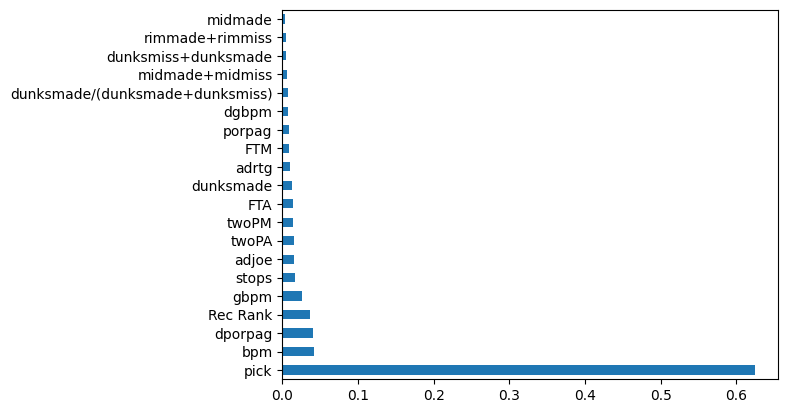

In [ ]:
# view importances, pick obviously is directly correlated to whether they are drafted or not
import matplotlib.pyplot as plt

rfc.fit(X, Y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
#run model without pick feature
data_final= data_final.drop(columns=['pick'])

start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)
X = data_final.drop(columns=['draft'],axis=1)
Y = data_final['draft']
X = pd.get_dummies(X)

print(f'{cross_val_score(rfc, X, Y, cv=10)}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

[0.97330192 0.97919121 0.9811469  0.97957581 0.98232522 0.98232522
 0.98193244 0.98153967 0.98311076 0.98389631]

Cross-validation time elapsed: 10.68 seconds.


Now our model is accurate more  than 97% of the time. And we can see the most important feautres.

<Axes: >

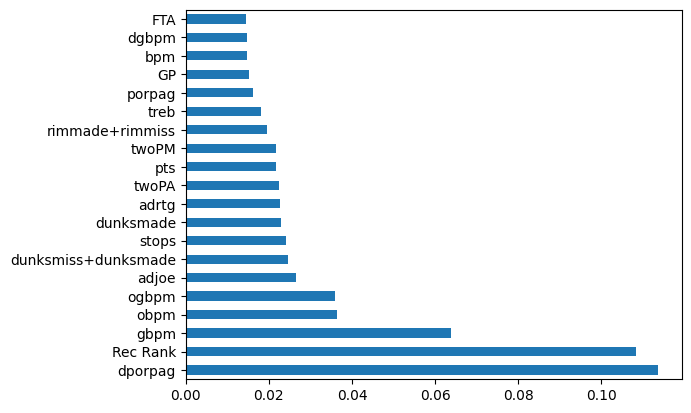

In [ ]:
# visualize which feautres are most important, top 20
rfc.fit(X, Y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

We can see the most imporant feature is "dporpag".  This feature represent the amount of points per game a player scores from a defensive action, adjusted to compare across positions.

From a basketball standpoint, this statistic not only represent defensive and offensive relaibilty , but intangible aspects like hustle, awareness, and basketball IQ.

To compare our previous model to another type, we will run our data through a classification model using logistic regression.  We start by standardizing  our data and then running it thriugh the model.

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_final)
data_df_scaled = pd.DataFrame(scaled_data, columns=data_final.columns)
data_df_scaled=data_df_scaled.drop(columns=['draft'],axis=1)
array = data_final['draft'].to_numpy()
array
data_df_scaled= data_df_scaled.assign(draft=array)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y_scaled = data_df_scaled['draft']
X_scaled = data_df_scaled.drop(columns=['draft'])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, random_state=2)

lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000, random_state=2)
lr.fit(X_train, y_train)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])


accuracy score: 0.9838202953188816
# of iterations 67


We can see that this model also has a relatively high accuracy.  However we choose the random forest model due to its ensembling and bagging effects , to reduce noise and counter overfitting

## Unsupervised Clustering Findings

To take an extra step of exploring our data to find relavant findings in our objective, we use clustering to see if we can distinguish players draft status.

We use DBSCAN as the clustering technique and UMAP as our dimesionality reduction technique to easily plot our data.

In [ ]:
!pip install umap-learn
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets
import umap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)


clusters = dbscan_cluster.fit_predict(X_scaled)

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_scaled)

4.705015

In [ ]:
colours = ['red', 'blue']
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], Y_scaled[i],
             color=colours[int(Y_scaled[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

There are several things to note from this plot.

First we see the sheer number of non draft picks compared to those drafted to the NBA. We can see why it is neccessary to find efficient ways to draft valuable players because the standards are so high to even be considered in the draft.

We can also see a that most of the draft picks are grouped on the left , possibly repsenting a cluster.  Understanding basketball, players that are drafted have higher statistics (whether on average or their modes are higher) compared to those not drafted.  However , we can see that within that cluster of draft picks are non draft picks.  We can attribute this to a number of reasons.  These non-draft players were not needed by any team due to team fits or even injury.  Many of these players very well, and most likely , played in the G-League or other professional leagues around the world. Compared to the non draft players further away from the draft picks, whose basketball careers most likely ended after college.



This product can be used by NBA executives and coaches to get an idea of which players from the NCAA could be good enough to be drafted.  Given the season average statistics of a player entering the draft, the model will be able to generate a list of players that would be drafted based on historical data.


Although statistics are not everything through the draft process, understanding them gives teams a place to start on which players to look at or even players that can be overlooked.  
